## 1.2.2 Bài tập thực hành 1

### Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ. Dữ liệu lấy tại https://www.kaggle.com/code/eisgandar/red-wine-quality-eda-classification

### Nhiệm vụ 1:
1. Chuẩn bị dữ liệu cho trực quan hóa dữ liệu

In [1]:
import pandas as pd
redwine_data = pd.read_csv("winequality-red.csv")
redwine_data = redwine_data[['volatile acidity','citric acid','pH','alcohol','quality']]

# Create a Alcohol_to_VA_Ratio based on the alcohol and volatile acidity variables:
redwine_data['Alcohol_to_VA_Ratio'] = redwine_data['alcohol']/redwine_data['volatile acidity']

display(redwine_data.info(), redwine_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   volatile acidity     1599 non-null   float64
 1   citric acid          1599 non-null   float64
 2   pH                   1599 non-null   float64
 3   alcohol              1599 non-null   float64
 4   quality              1599 non-null   int64  
 5   Alcohol_to_VA_Ratio  1599 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 75.1 KB


None

,volatile acidity,citric acid,pH,alcohol,quality,Alcohol_to_VA_Ratio
0,0.70,0.00,3.51,9.4,5,13.428571
1,0.88,0.00,3.20,9.8,5,11.136364
2,0.76,0.04,3.26,9.8,5,12.894737
3,0.28,0.56,3.16,9.8,6,35.000000
4,0.70,0.00,3.51,9.4,5,13.428571


2. Trực quan hóa dữ liệu với thư viện **Matplotlib**

In [2]:
import matplotlib.pyplot as plt
redwine_sorted = redwine_data.sort_values('quality', ascending = False)
redwine_sorted.head()

,volatile acidity,citric acid,pH,alcohol,quality,Alcohol_to_VA_Ratio
828,0.57,0.09,3.46,12.7,8,22.280702
1549,0.36,0.30,3.24,11.4,8,31.666667
1449,0.38,0.31,3.23,11.3,8,29.736842
1403,0.33,0.33,3.23,10.0,8,30.303030
495,0.35,0.53,3.15,11.0,8,31.428571


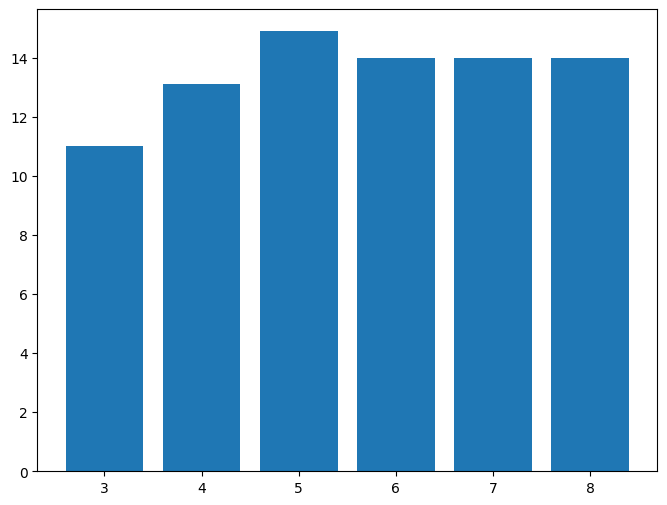

In [3]:
# case 1: basic
plt.figure(figsize=(8, 6))
plt.bar(redwine_sorted['quality'], redwine_sorted['alcohol'], edgecolor='none')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

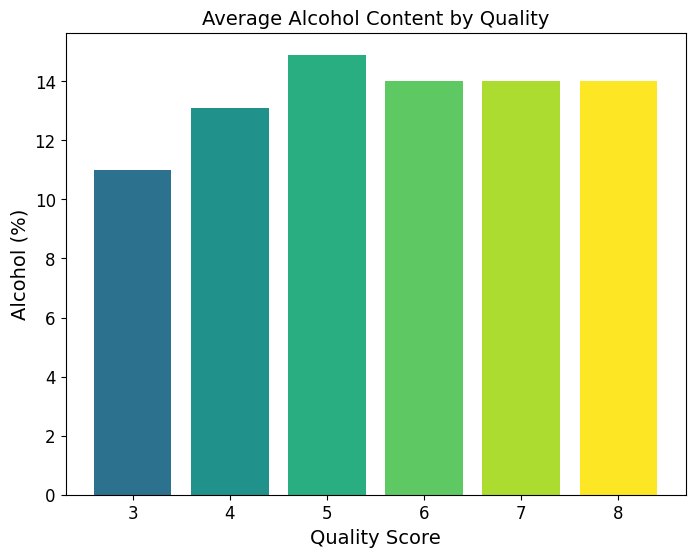

In [4]:
# case 2: advance 1
plt.figure(figsize=(8,6))
colors = plt.cm.viridis(redwine_sorted['quality'] / max(redwine_sorted['quality']))
plt.bar(redwine_sorted['quality'], redwine_sorted['alcohol'], color=colors, edgecolor='none')
plt.title('Average Alcohol Content by Quality', fontsize=14)
plt.xlabel('Quality Score', fontsize=14)
plt.ylabel('Alcohol (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

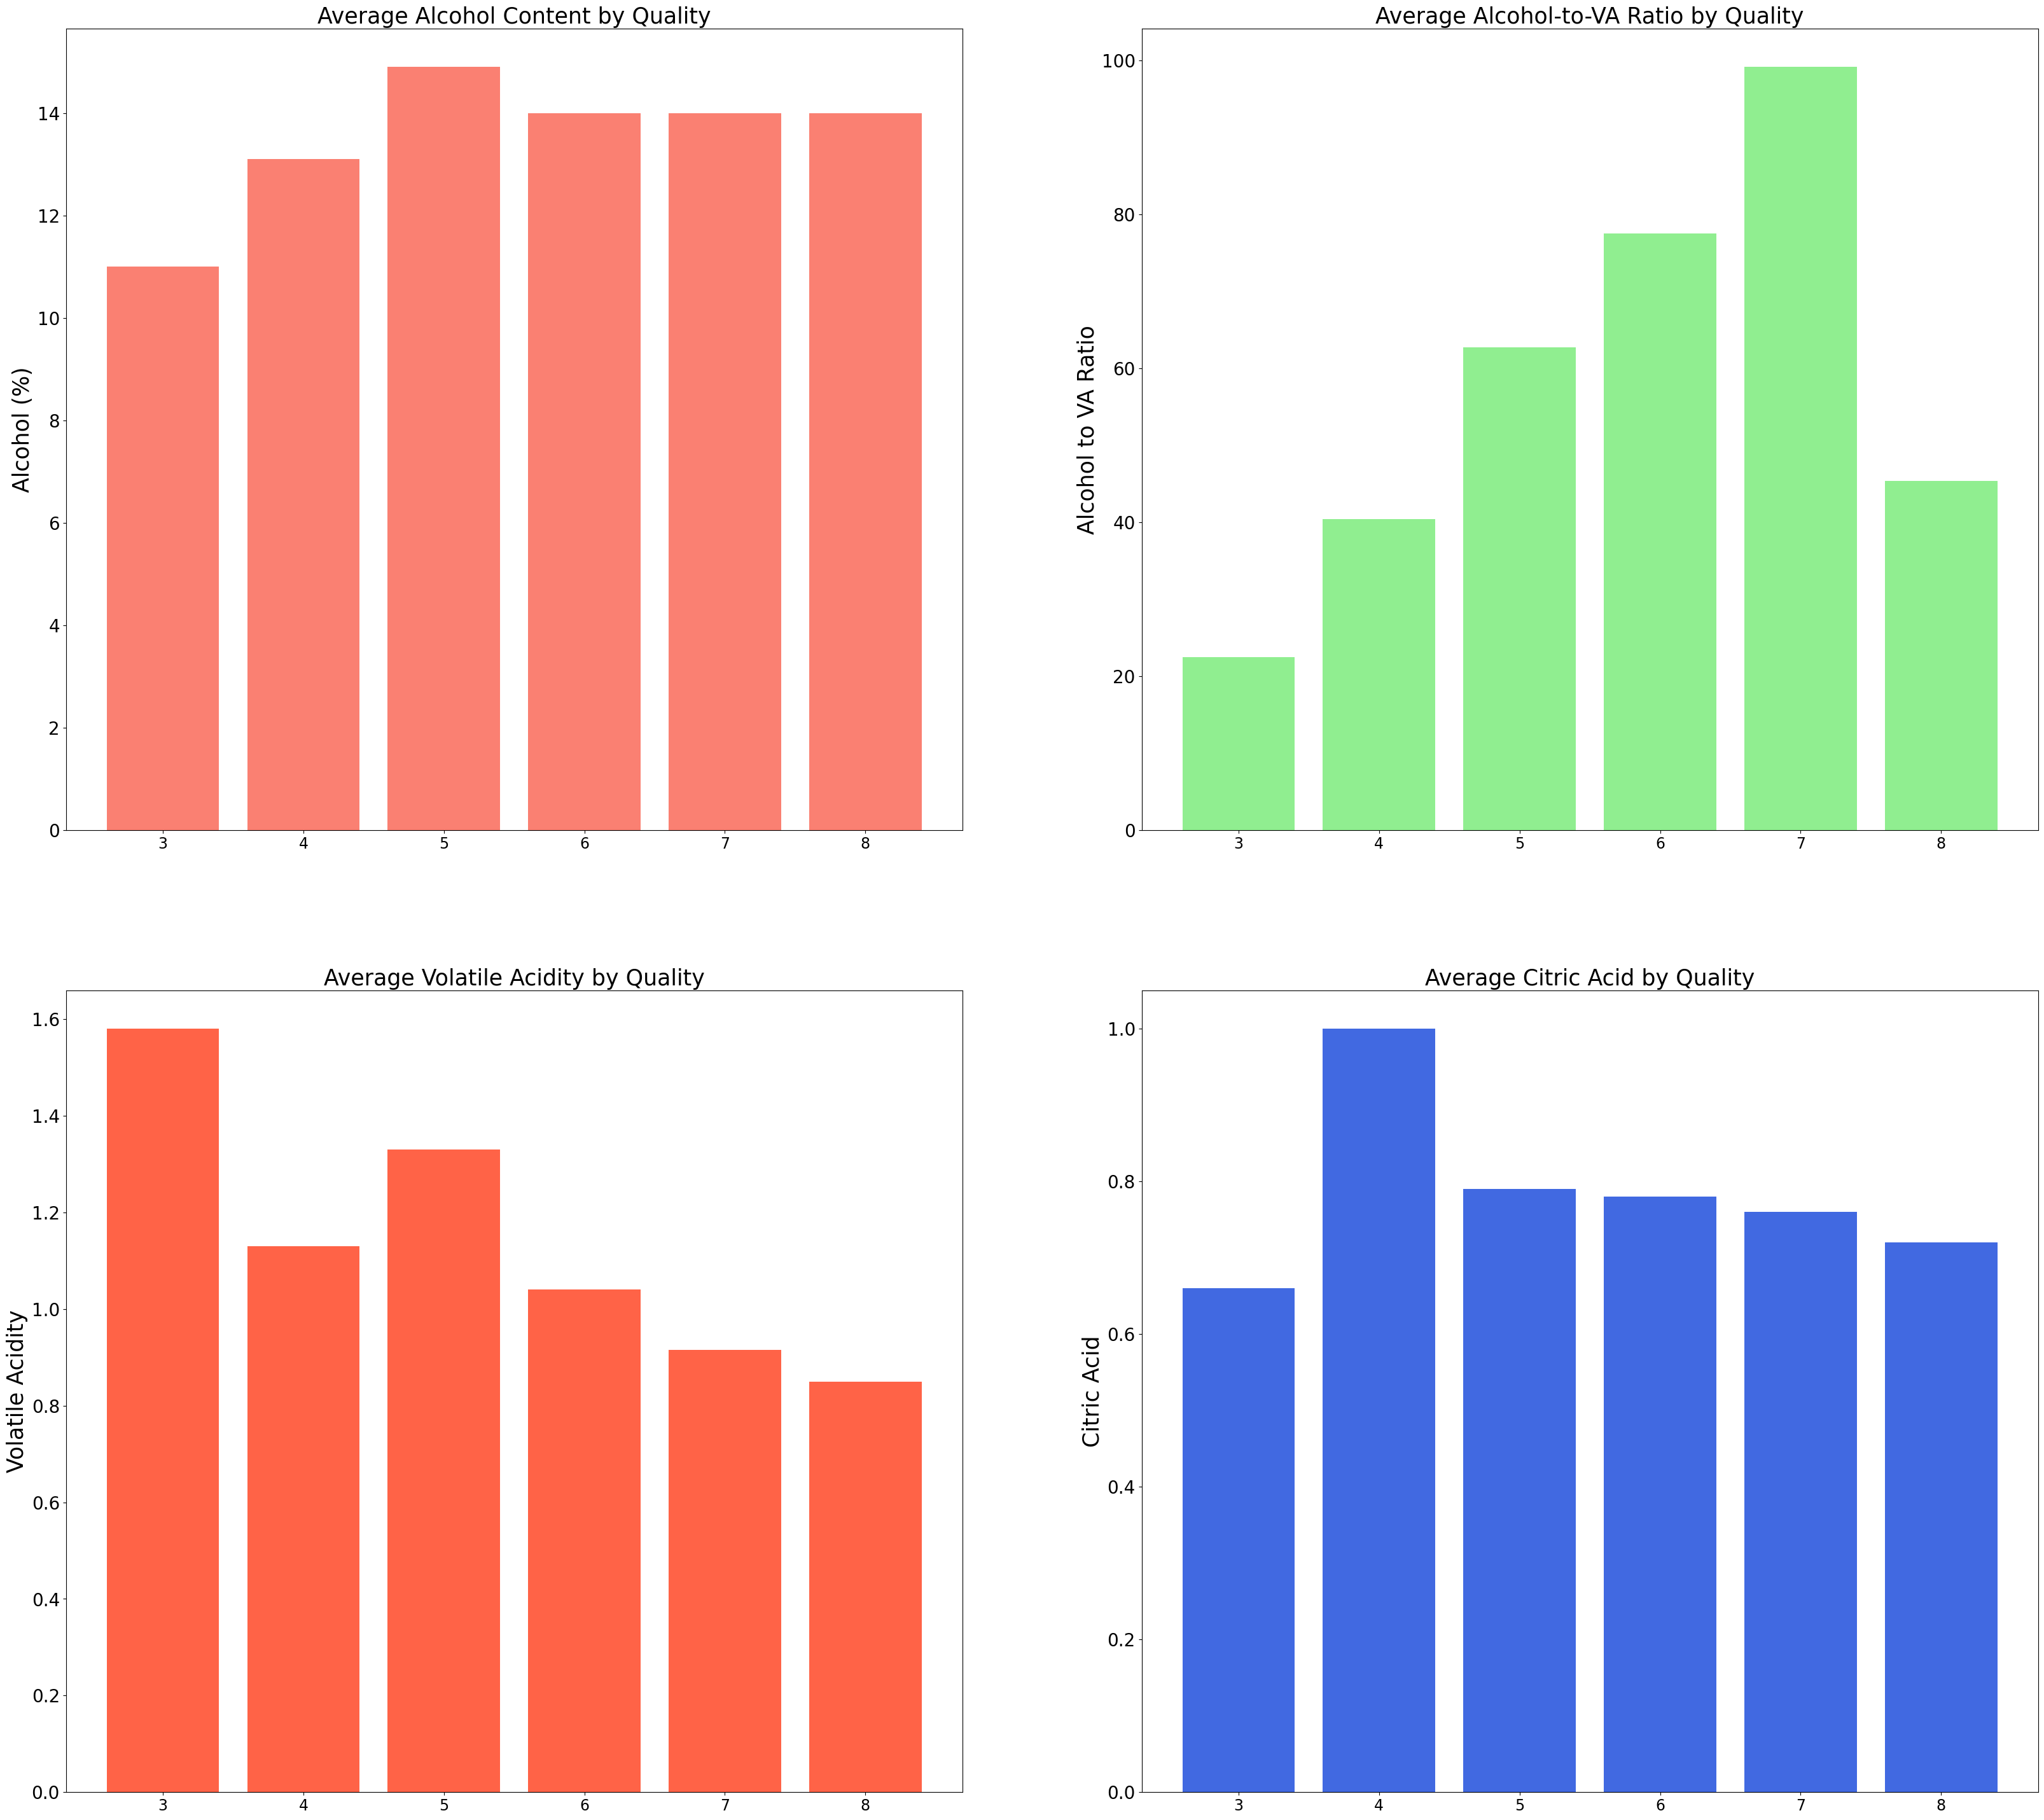

In [5]:
# case 3: advance 2
plt.figure(figsize=(40,36))
x = redwine_sorted['quality']
y = redwine_sorted['alcohol']
y1 = redwine_sorted['Alcohol_to_VA_Ratio']
y2 = redwine_sorted['volatile acidity']
y3 = redwine_sorted['citric acid']

plt.subplot(2,2,1)
plt.bar(x,y, color='salmon', edgecolor='none')
plt.xticks(fontsize=17)
plt.ylabel('Alcohol (%)', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Average Alcohol Content by Quality',fontsize=25)

plt.subplot(2,2,2)
plt.bar(x,y1, color='lightgreen', edgecolor='none')
plt.xticks(fontsize=17)
plt.ylabel('Alcohol to VA Ratio',fontsize=25)
plt.yticks(fontsize=20)
plt.title('Average Alcohol-to-VA Ratio by Quality', fontsize=25)

plt.subplot(2,2,3)
plt.bar(x,y2, color='tomato', edgecolor='none')
plt.xticks(fontsize=17)
plt.ylabel('Volatile Acidity',fontsize=25)
plt.yticks(fontsize=20)
plt.title('Average Volatile Acidity by Quality', fontsize=25)

plt.subplot(2,2,4)
plt.bar(x,y3, color='royalblue', edgecolor='none')
plt.xticks(fontsize=17)
plt.ylabel('Citric Acid',fontsize=25)
plt.yticks(fontsize=20)
plt.title('Average Citric Acid by Quality', fontsize=25)

plt.show()

3. Trực quan hóa dữ liệu với thư viện **Seaborn**

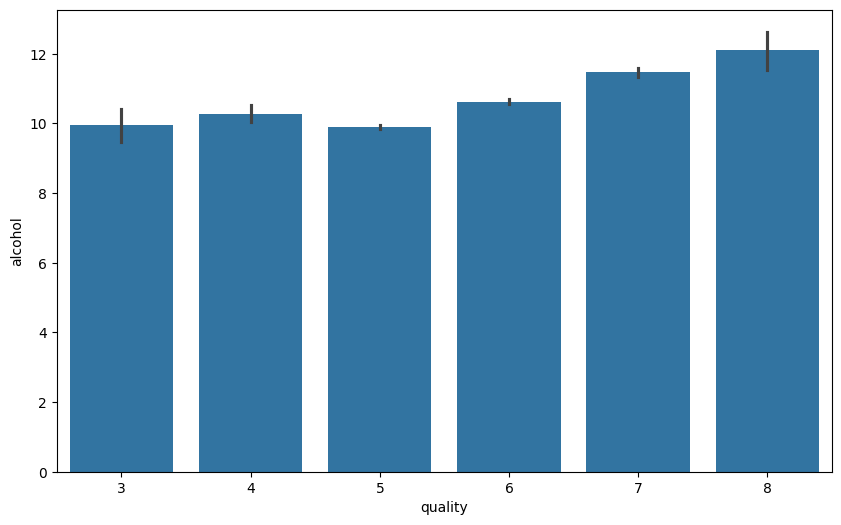

In [6]:
import seaborn as sns
# case 1: basic
plt.figure(figsize=(10, 6))
data = redwine_sorted
sns.barplot(data= data, x='quality', y='alcohol')
plt.show()

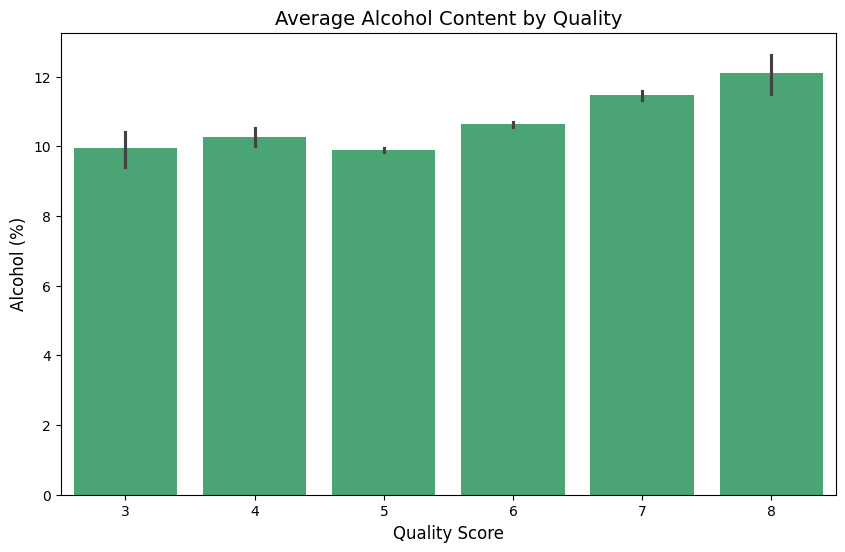

In [7]:
# case 2: advance 1
plt.figure(figsize= (10, 6))
data = redwine_sorted
ax = sns.barplot(data= data, x = 'quality', y= 'alcohol', color='mediumseagreen')
ax.set_xlabel('Quality Score',fontsize= 12)
ax.set_ylabel('Alcohol (%)',fontsize= 12)
ax.set_title('Average Alcohol Content by Quality', fontsize= 14)
plt.show()

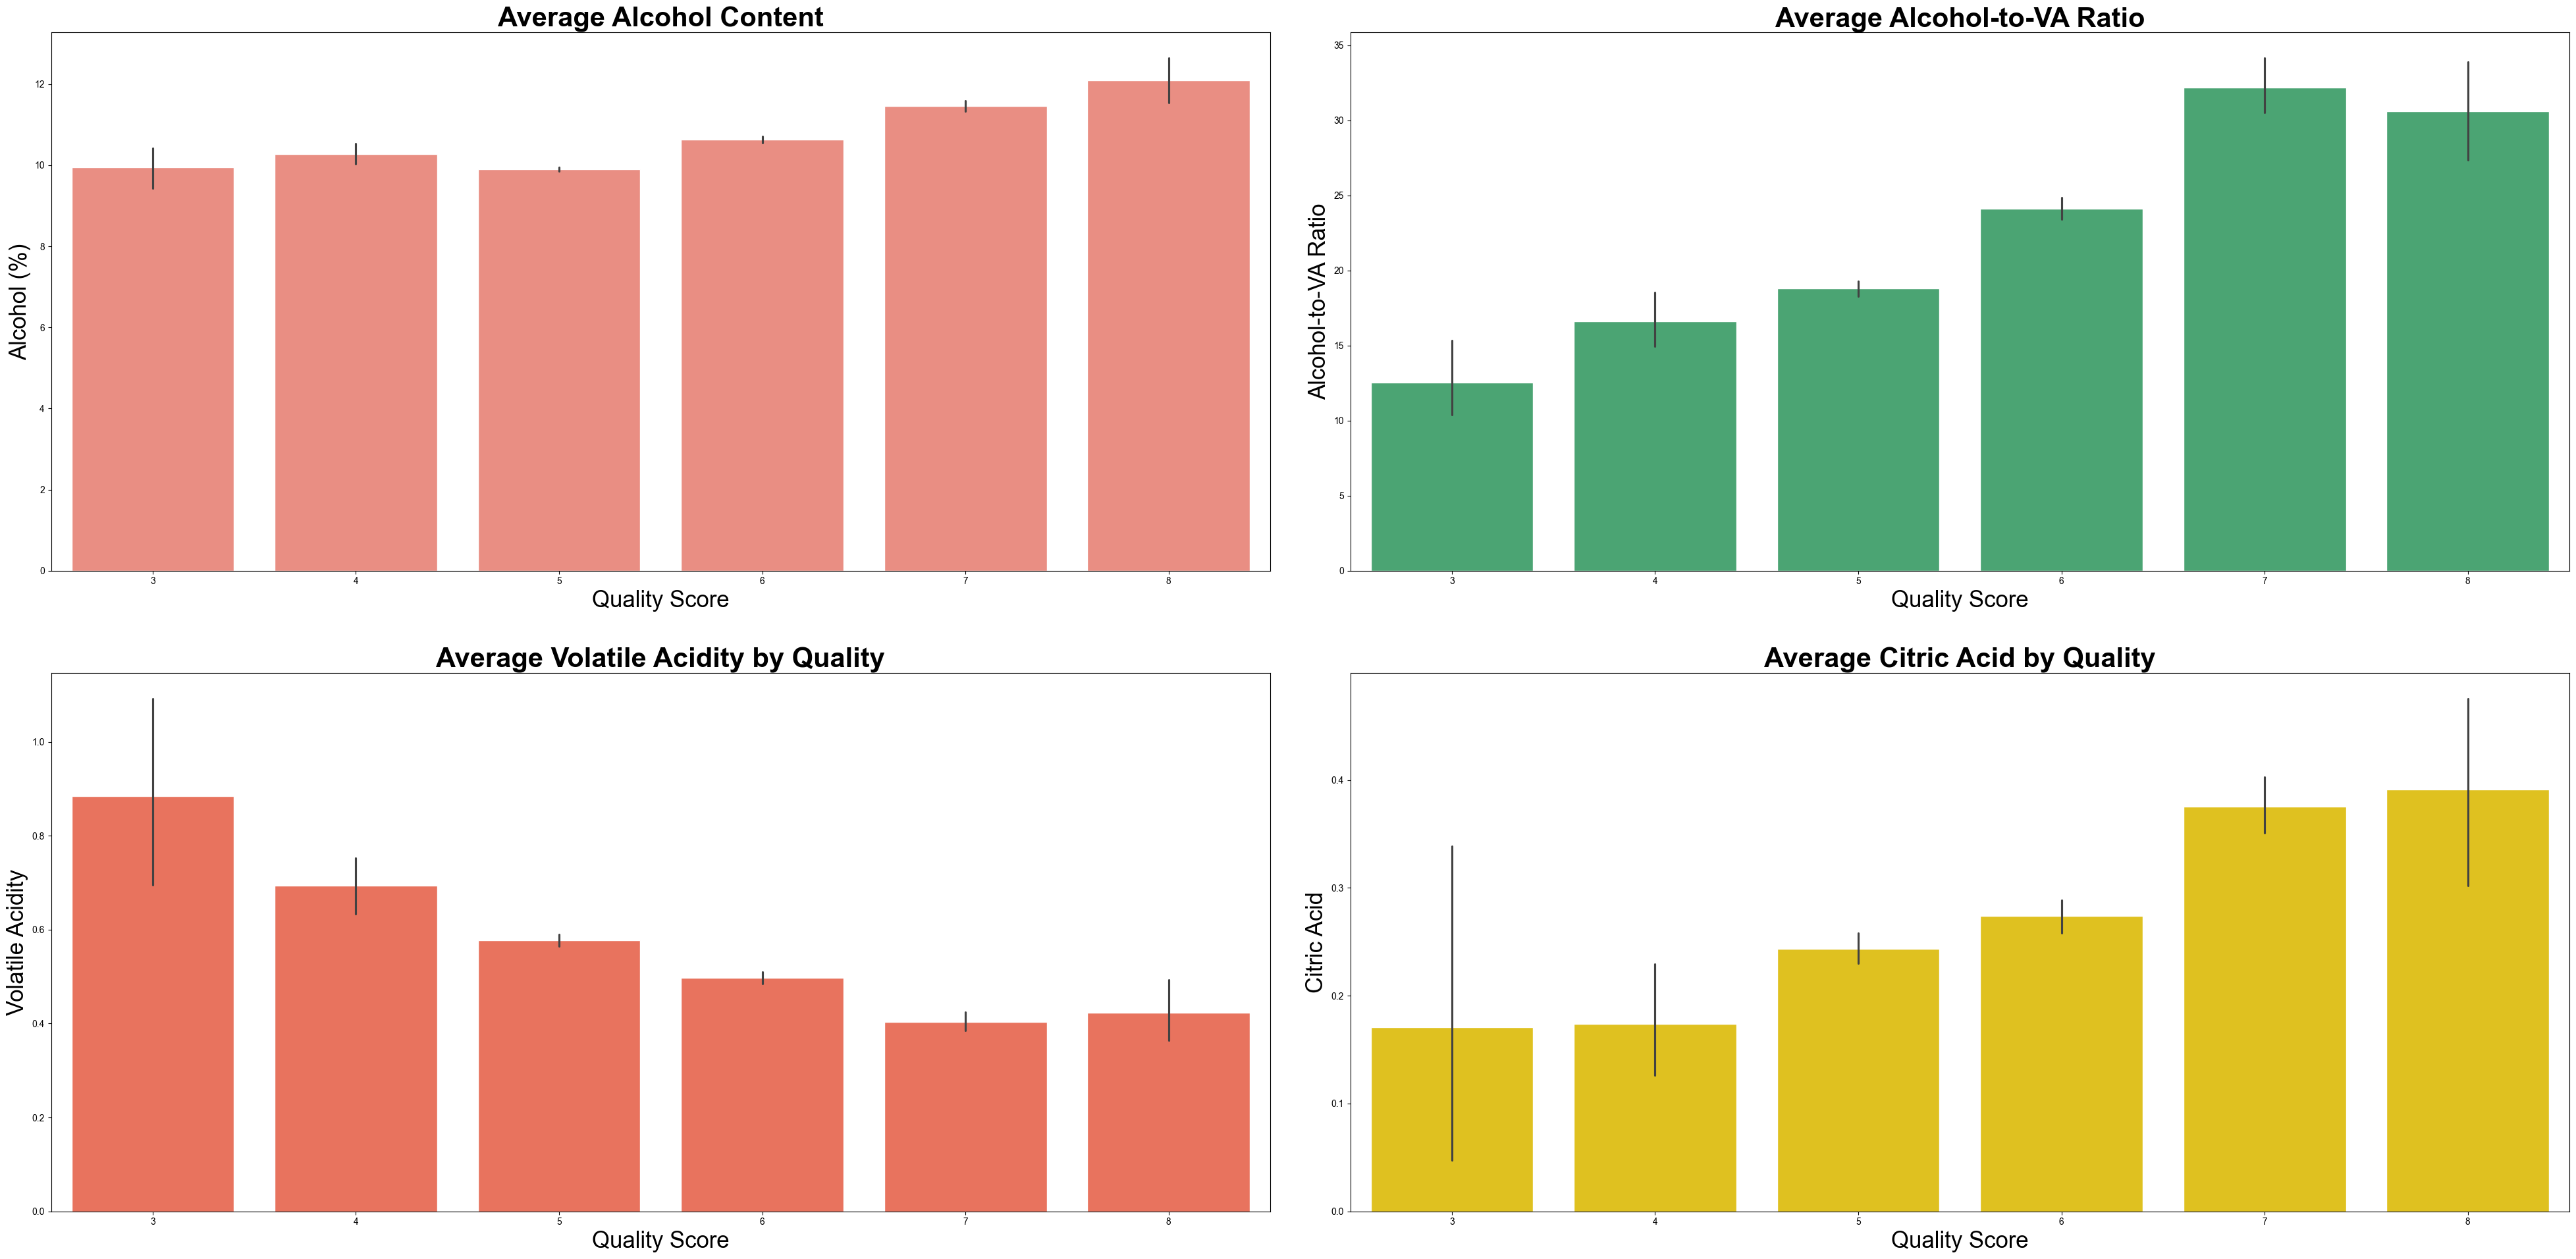

In [8]:
# case 3: view multiple perspectives at once
fig, ax = plt.subplots(2, 2, figsize= (40,20))
data = redwine_sorted
sns.set(font_scale= 3)

sns.barplot(data=data, x='quality', y='alcohol', color='salmon', ax=ax[0,0])
ax[0,0].set_title('Average Alcohol Content', fontsize=30, fontweight='bold')
ax[0,0].set_xlabel('Quality Score', fontsize=25)
ax[0,0].set_ylabel('Alcohol (%)', fontsize=25)

sns.barplot(data=data, x='quality', y='Alcohol_to_VA_Ratio', color='mediumseagreen', ax=ax[0,1])
ax[0,1].set_title('Average Alcohol-to-VA Ratio', fontsize=30, fontweight='bold')
ax[0,1].set_xlabel('Quality Score', fontsize=25)
ax[0,1].set_ylabel('Alcohol-to-VA Ratio', fontsize=25)

sns.barplot(data=data, x='quality', y='volatile acidity', color='tomato', ax=ax[1,0])
ax[1,0].set_title('Average Volatile Acidity by Quality', fontsize=30, fontweight='bold')
ax[1,0].set_xlabel('Quality Score', fontsize=25)
ax[1,0].set_ylabel('Volatile Acidity', fontsize=25)

sns.barplot(data=data, x='quality', y='citric acid', color='gold', ax=ax[1,1])
ax[1,1].set_title('Average Citric Acid by Quality', fontsize=30, fontweight='bold')
ax[1,1].set_xlabel('Quality Score', fontsize=25)
ax[1,1].set_ylabel('Citric Acid', fontsize=25)

plt.tight_layout()
plt.show()

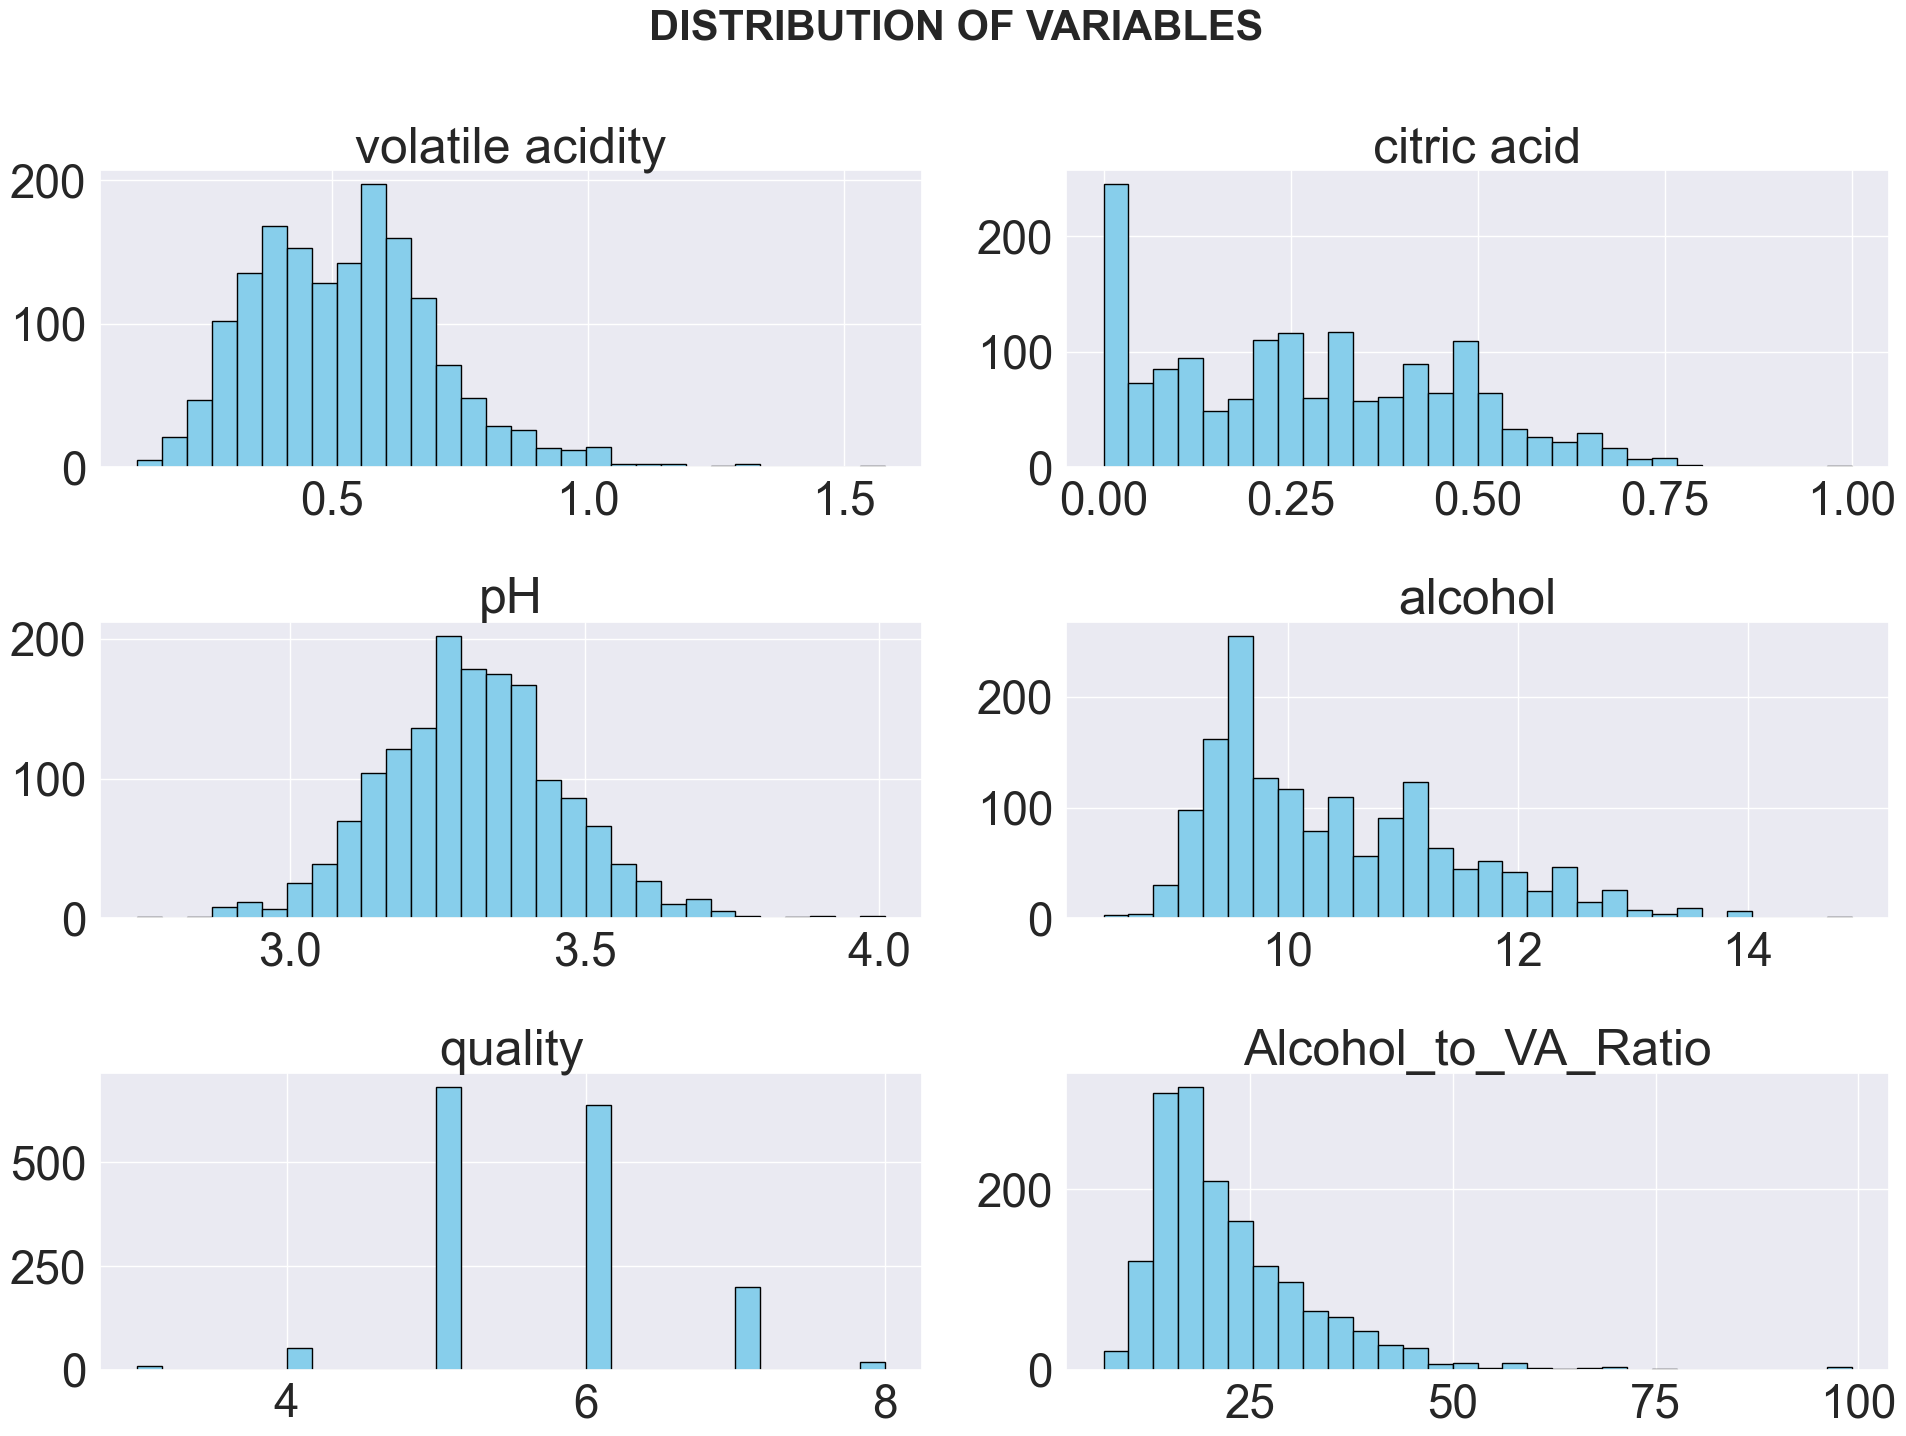

In [9]:
# HISTOGRAM CHO TẤT CẢ CÁC BIẾN SỐ
redwine_data.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')

plt.suptitle('DISTRIBUTION OF VARIABLES', fontsize=30, fontweight='bold')
plt.tight_layout()
plt.show()

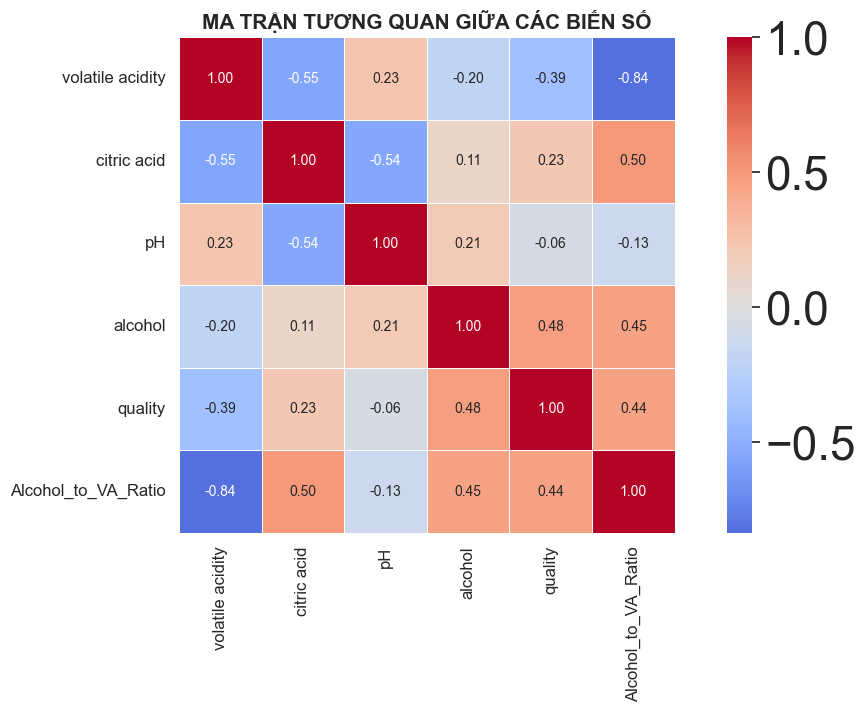

In [10]:
#  MA TRẬN TƯƠNG QUAN
plt.figure(figsize=(12, 8))
correlation_matrix = redwine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',center=0, square=True, linewidths=0.5, fmt='.2f', annot_kws={"size":10})
plt.title('MA TRẬN TƯƠNG QUAN GIỮA CÁC BIẾN SỐ', fontweight='bold', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

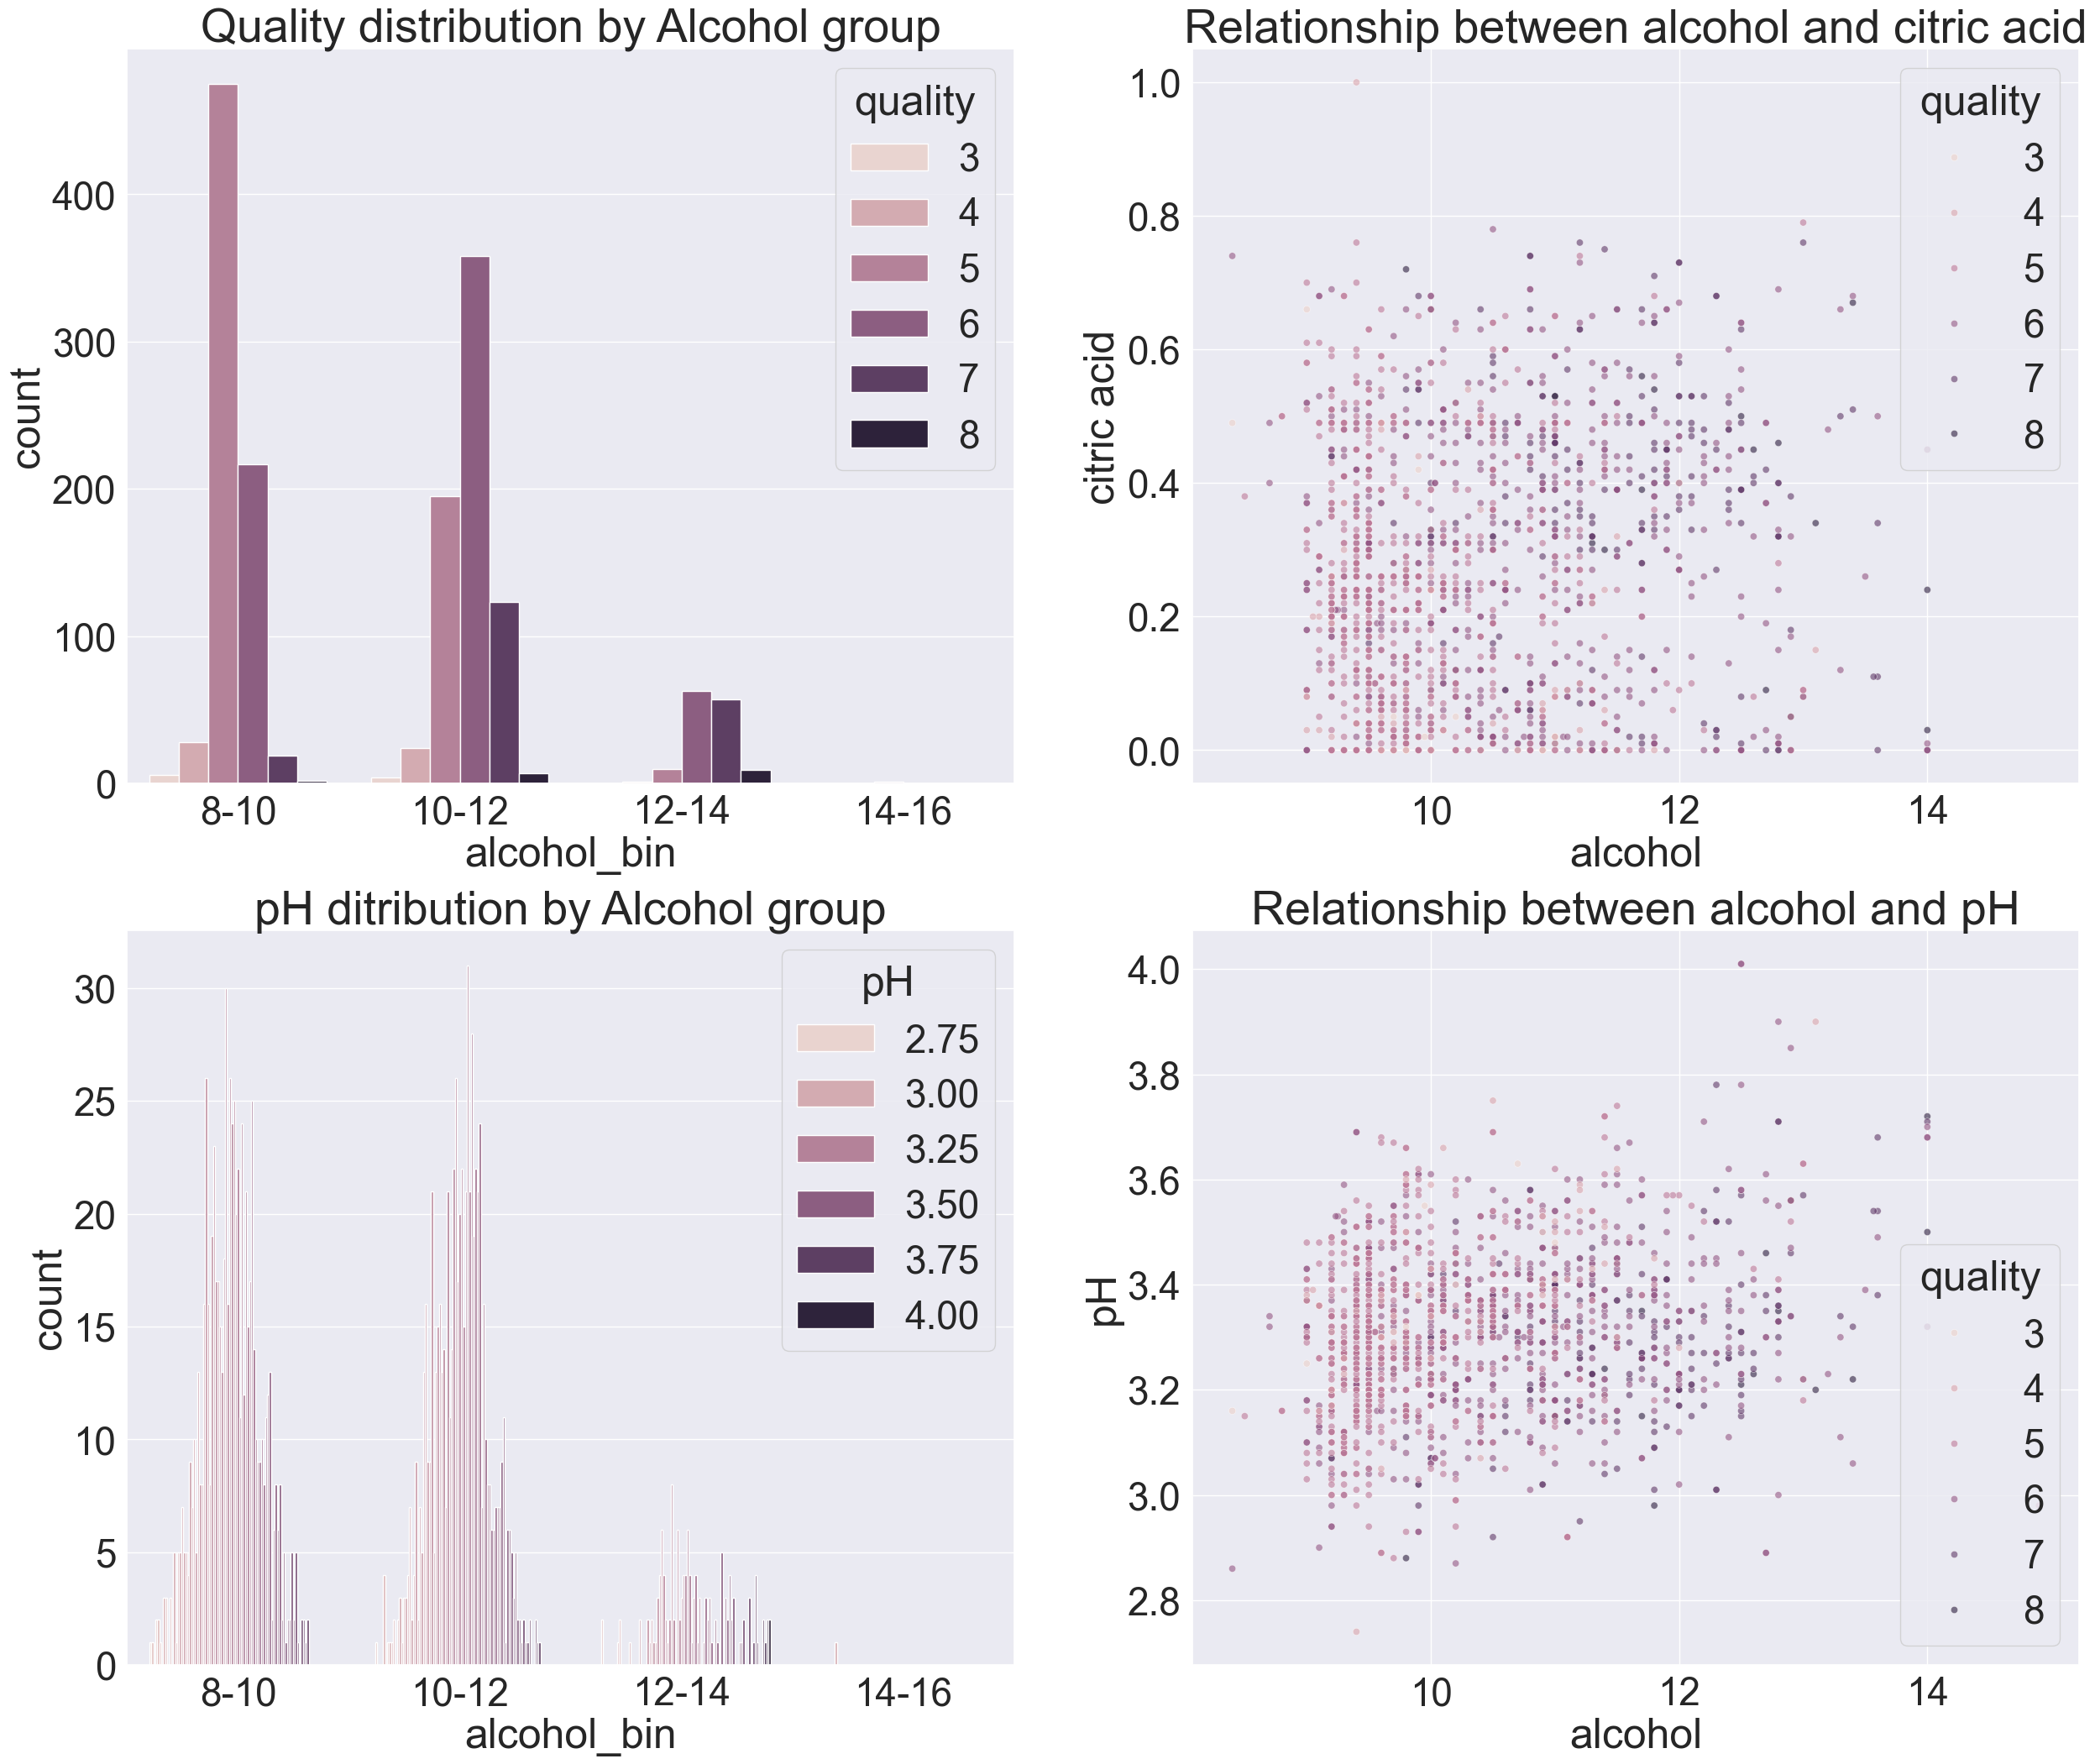

In [11]:
# Phân tích chất lượng theo alcohol
plt.figure(figsize=(30,25))

# Chia alcohol thành nhóm
bins = [8,10,12,14,16]
labels = ['8-10','10-12','12-14','14-16']
redwine_sorted['alcohol_bin'] = pd.cut(redwine_sorted['alcohol'], bins=bins,labels=labels)

plt.subplot(2,2,1)
sns.countplot(data=redwine_sorted, x='alcohol_bin',hue='quality')
plt.title('Quality distribution by Alcohol group',fontsize=40)

plt.subplot(2,2,2)
sns.scatterplot(data=redwine_sorted,x='alcohol',y='citric acid',hue='quality',alpha=0.6,color='teal')
plt.title('Relationship between alcohol and citric acid',fontsize=40)

plt.subplot(2,2,3)
sns.countplot(data=redwine_sorted,x='alcohol_bin',hue='pH')
plt.title('pH ditribution by Alcohol group',fontsize=40)

plt.subplot(2,2,4)
sns.scatterplot(data=redwine_sorted,x='alcohol',y='pH',hue='quality',alpha=0.6, color='lightgreen')
plt.title('Relationship between alcohol and pH',fontsize=40)

plt.show()

In [12]:
# THỐNG KÊ TỔNG QUAN
total_count = len(redwine_data)

print(f"Total: {total_count}")
print(f"Average Alcohol: {redwine_data['alcohol'].mean():.1f}")
print(f"Average Volatile Acidity: {redwine_data['volatile acidity'].mean():.1f}")
print(f"Average Citric Acid: {redwine_data['citric acid'].mean():.1f}")
print(f"Average pH: {redwine_data['pH'].mean():.1f}")
print(f"Average Quality: {redwine_data['quality'].mean():.1f}")

Total: 1599
Average Alcohol: 10.4
Average Volatile Acidity: 0.5
Average Citric Acid: 0.3
Average pH: 3.3
Average Quality: 5.6


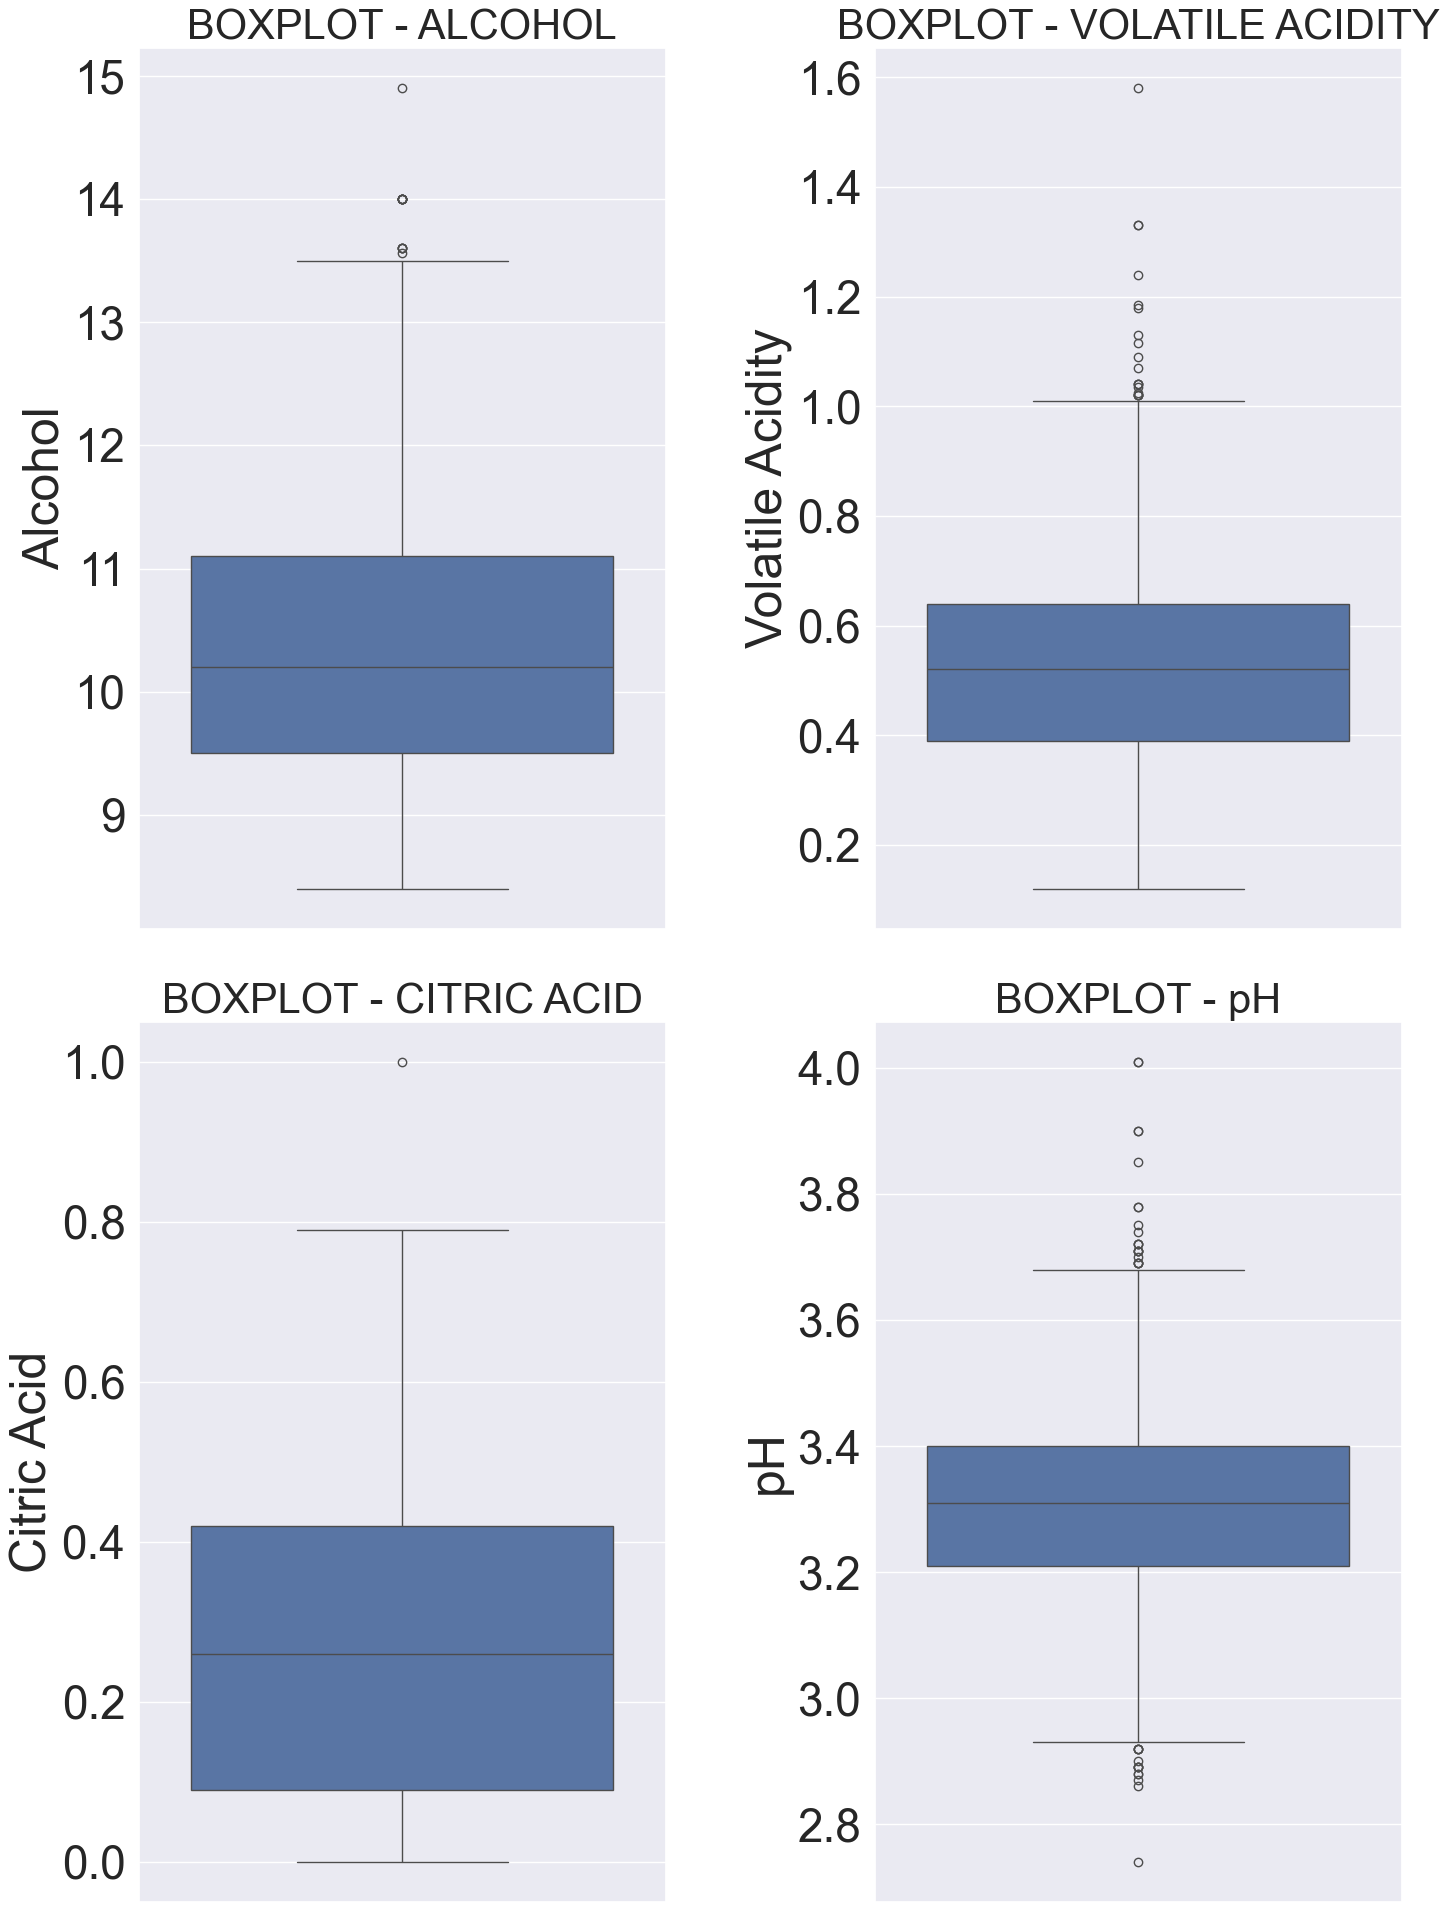

In [13]:
# OUTLIERS
plt.figure(figsize=(15,20))

# Boxplot for alcohol
plt.subplot(2,2,1)
sns.boxplot(y=redwine_data['alcohol'])
plt.title('BOXPLOT - ALCOHOL',fontsize=30)
plt.ylabel('Alcohol')

# Boxplot for volatile acidity
plt.subplot(2,2,2)
sns.boxplot(y=redwine_data['volatile acidity'])
plt.title('BOXPLOT - VOLATILE ACIDITY',fontsize=30)
plt.ylabel('Volatile Acidity')

# Boxplot for citric acid
plt.subplot(2,2,3)
sns.boxplot(y=redwine_data['citric acid'])
plt.title('BOXPLOT - CITRIC ACID',fontsize=30)
plt.ylabel('Citric Acid')

# Boxplot for pH
plt.subplot(2,2,4)
sns.boxplot(y=redwine_data['pH'])
plt.title('BOXPLOT - pH',fontsize=30)
plt.ylabel('pH')

plt.tight_layout()
plt.show()